In [1]:
pip install google-generativeai


In [2]:
import google.generativeai as genai
import pathlib
import textwrap

# Used to securely store API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('.',' *')
  return Markdown(textwrap.indent(text,'>',predicate=lambda _:True))

In [3]:
import os
os.environ['GOOGLE_API_KEY']=""


In [4]:
genai.configure(api_key=os.environ['GOOGLE_API_KEY'])


In [5]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision


In [10]:
model = genai.GenerativeModel('gemini-pro-vision')

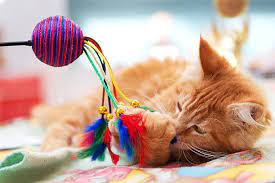

In [7]:

import PIL.Image

img= PIL.Image.open('cat.jpeg')
img

In [12]:
response= model.generate_content(img)
to_markdown(response.text)

> A cat playing with a toy *

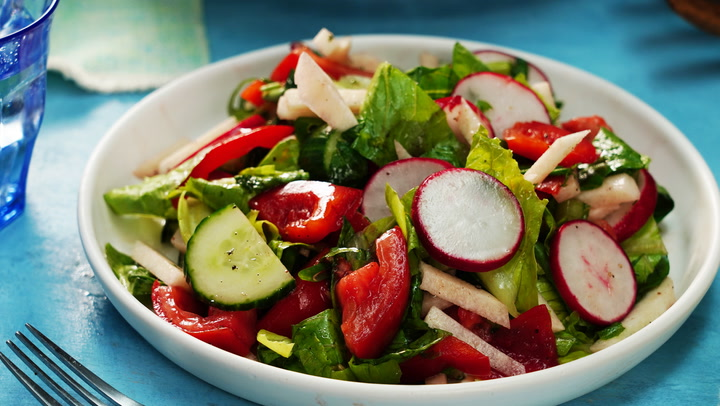

In [14]:
salad= PIL.Image.open('salad.jpg')
salad

In [16]:
response1= model.generate_content(salad)
to_markdown(response1.text)

> This is a salad made with radishes, cucumbers, peppers, and lettuce * It is dressed with a simple vinaigrette dressing * The salad is light and refreshing, and it is a perfect side dish for any meal *
>
>To make the salad, you will need the following ingredients:
>
>* 1 bunch of radishes, trimmed and thinly sliced
>* 1 English cucumber, peeled and thinly sliced
>* 1 red bell pepper, seeded and thinly sliced
>* 1 head of lettuce, torn into bite-sized pieces
>* 1/4 cup of olive oil
>* 1/4 cup of red wine vinegar
>* 1 teaspoon of Dijon mustard
>* 1/2 teaspoon of honey
>* 1/4 teaspoon of salt
>* 1/4 teaspoon of black pepper
>
>To make the dressing, whisk together the olive oil, red wine vinegar, Dijon mustard, honey, salt, and black pepper *
>
>To assemble the salad, combine the radishes, cucumbers, peppers, and lettuce in a large bowl * Pour the dressing over the salad and toss to coat *
>
>Serve the salad immediately *

In [19]:
response1= model.generate_content(["Write the calorie value and describe the positives of food",salad],stream=True)
response1.resolve()
to_markdown(response1.text)

> This salad is very low in calories, with only 120 calories per serving * It is also very high in nutrients, including vitamins, minerals, and antioxidants * The main ingredients are radishes, which are a good source of vitamin C and potassium * The salad also contains cucumbers, which are a good source of water and fiber * The tomatoes are a good source of vitamins and minerals, and the onion is a good source of sulfur * The salad is dressed with a light vinaigrette dressing, which is made with olive oil, vinegar, and herbs * The dressing adds a little bit of flavor and fat to the salad, but it does not add a lot of calories * This salad is a healthy and delicious way to get your daily dose of vegetables * It is also a low-calorie option for those who are trying to lose weight or maintain a healthy weight *

In [21]:
 for chunk in response1:
  print(chunk.text)
  print("_"*100)

 This salad is very low in calories, with only 120 calories per serving. It is also very high in nutrients, including vitamins, minerals,
____________________________________________________________________________________________________
 and antioxidants. The main ingredients are radishes, which are a good source of vitamin C and potassium. The salad also contains cucumbers, which are a good source
____________________________________________________________________________________________________
 of water and fiber. The tomatoes are a good source of vitamins and minerals, and the onion is a good source of sulfur. The salad is dressed with a light vinaigrette dressing, which is made with olive oil, vinegar, and herbs. The dressing adds a little bit of flavor and fat to the salad, but it
____________________________________________________________________________________________________
 does not add a lot of calories. This salad is a healthy and delicious way to get your daily dose 